- 添加信息让pandas的显示变宽

In [1]:
import pandas as pd
pd.set_option('display.height',1000)
pd.set_option('display.width',800)
pd.set_option('display.max_rows',30)
pd.set_option('display.max_columns',12)

- 解决mac引入matplot问题
- 解决plt中文乱码及黑体不显示负号问题

In [2]:
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
# 解决plt中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决黑体不显示负号的问题

- 允许JupyterNotebook自动显示多行变量

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

- 其他import

In [41]:
import numpy as np

- 加载数据

In [3]:
path = "/Users/zac/5-Algrithm/python/8-DataVisualize/sample/info.csv"
df = pd.read_csv(path,delimiter="\t")

- 观察下数据，看怎么做可视化
    - 测试时注意到 series 的groupby只能使用series作为参数，不能用普通的list
    - df的groupby操作多种多样，还支持使用函数进行group
        - groupby后直接sum，后续只需要reset_index就可以恢复为原始的columns；
        - groupby后使用apply做更高级的操作，除了要reset_index还需要rename，因为没有被groupby使用的列名会变成数字编号
            - ``` result1 = df.groupby(by=['package_name','channel_id','rule']).apply(lambda df: np.sum(df['ac命中人数']))
            result1.reset_index().rename(columns={0:'0701_0731间ac命中总人数'}) ```
        

In [63]:
df.columns
# ?df.sort_values
result = df.groupby(by=['package_name','channel_id','rule']).sum().reset_index()
result = result.sort_values(by=['package_name','channel_id','ac命中人数'], ascending=[True,True,False])
result.head(10)
# result1 = df.groupby(by=['package_name','channel_id','rule']).apply(lambda df: np.sum(df['ac命中人数']))
# result1.reset_index().rename(columns={0:'0701_0731间ac命中总人数'})


Index(['package_name', 'channel_id', 'dt', 'rule', 'ac命中人数'], dtype='object')

,package_name,channel_id,rule,ac命中人数
2,com.apusapps.browser,300163,"R1019, 操作系统版本异常",2104
12,com.apusapps.browser,300163,"R159, 命中ip黑名单-apus_ai_GR018-黑库加激活匹配抽取ip黑名单",1602
24,com.apusapps.browser,300163,"R161, 命中android_id黑名单-apus_ai_GR029-活跃用户的IP频次分...",678
28,com.apusapps.browser,300163,"R40, 安装高危软件",569
18,com.apusapps.browser,300163,"R161, 命中android_id黑名单-apus_ai_GR012-渠道内传感器数据无变...",538
26,com.apusapps.browser,300163,"R33, 具有ROOT权限v4",430
16,com.apusapps.browser,300163,"R161, 命中android_id黑名单-apus_ai_GR010-渠道大量使用代理激活",101
25,com.apusapps.browser,300163,"R300, 用户行为异常",80
11,com.apusapps.browser,300163,"R1300, 激活三天内没有records和request打点记录",76
5,com.apusapps.browser,300163,"R1042, 是否连接过wifi/wifi列表为空",57


- 使用处理过的数据进行可视化
    - 只取命中人数在均值以上的规则进行输出

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


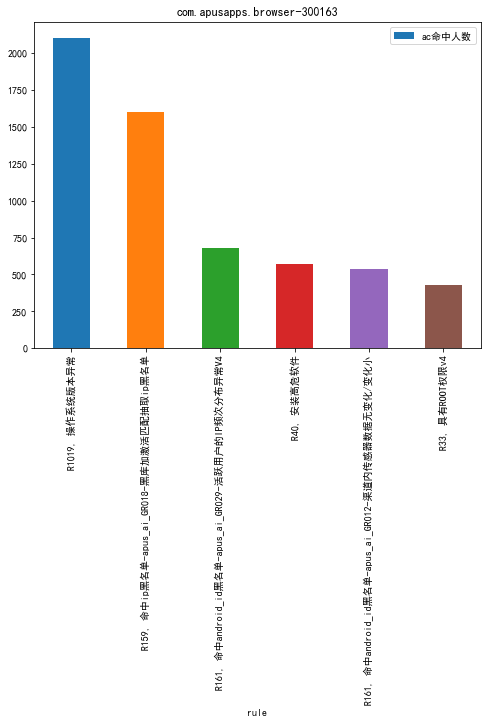

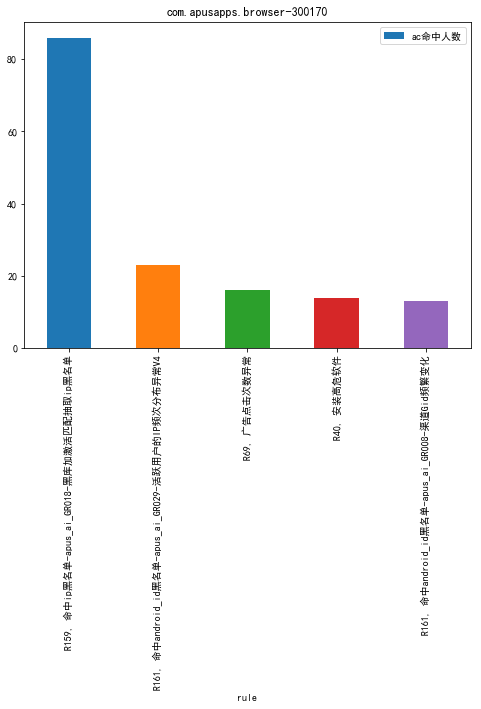

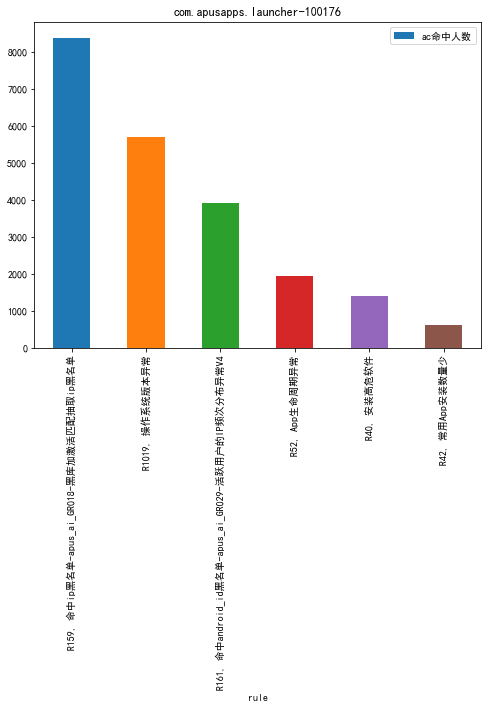

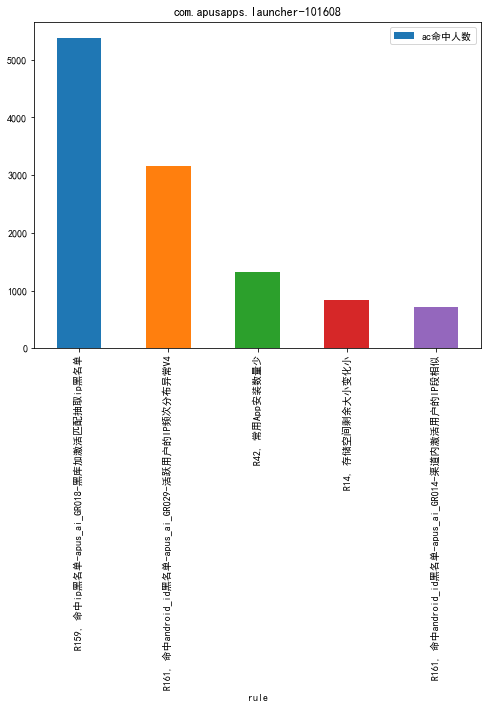

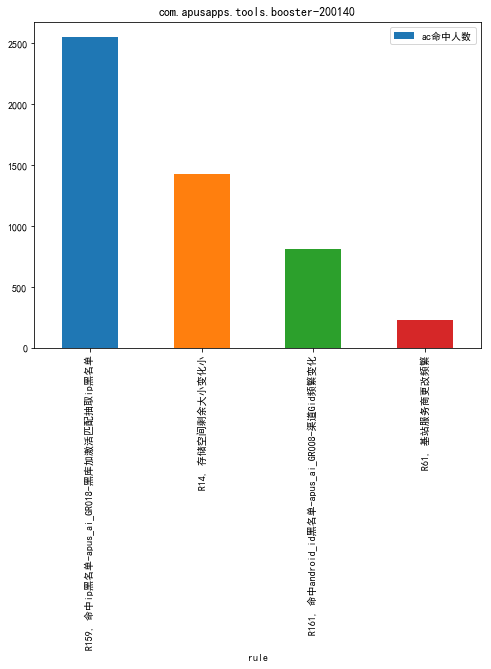

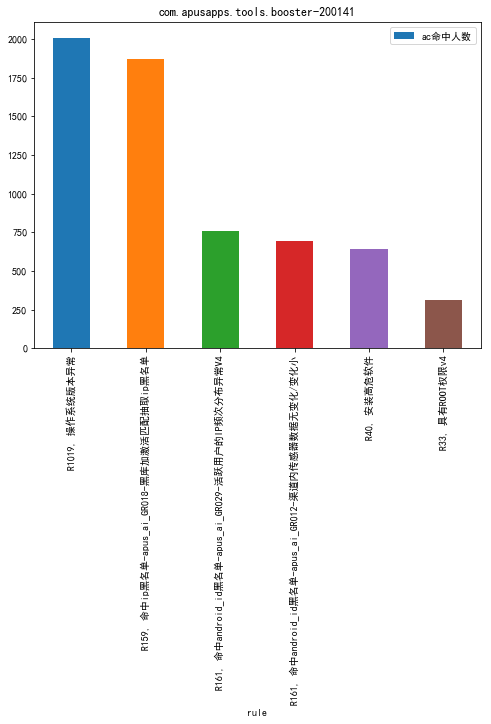

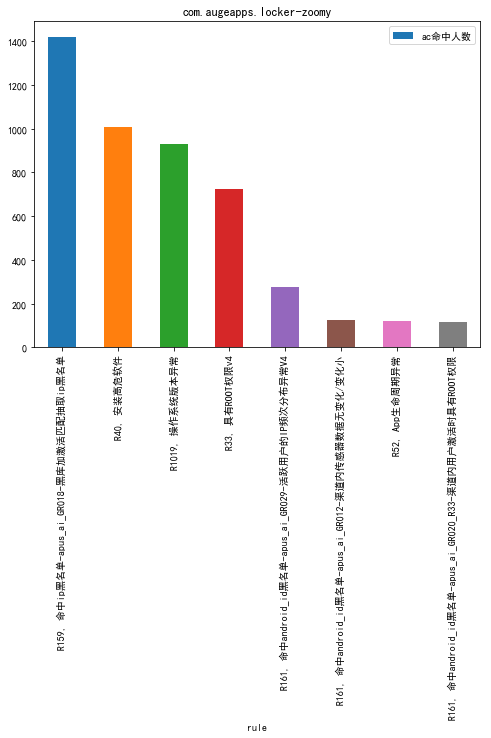

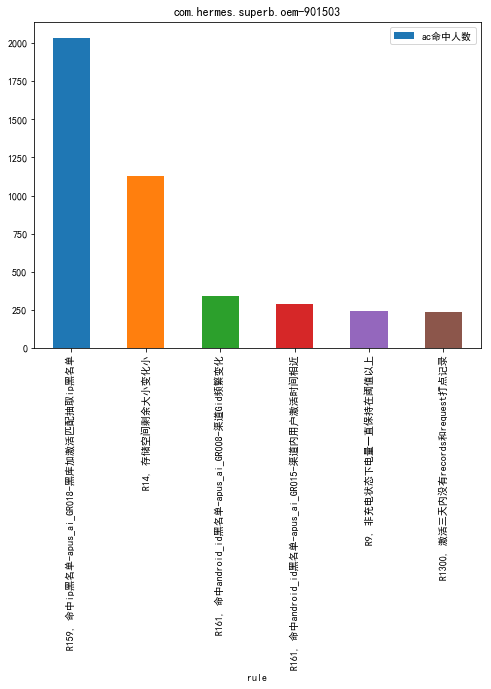

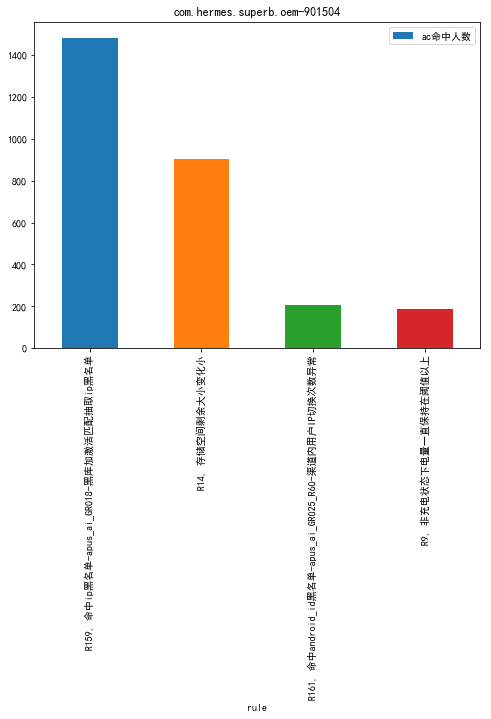

In [99]:
# 在jupyternoteboook中显示plt图
%matplotlib inline
all_descriptions = result.drop_duplicates(subset=['rule'])['rule']
# result[result['rule']==list(all_descriptions)[0]]
plt.figure()
for pn in result['package_name'].drop_duplicates():
    df_tmp = result[result['package_name']==pn]
    for chid in list(df_tmp['channel_id'].drop_duplicates()):
        df_tmp_tmp = df_tmp[result['channel_id']==chid]
        threshold = df_tmp_tmp['ac命中人数'].mean()
        df_tmp_tmp = df_tmp_tmp[df_tmp_tmp['ac命中人数']>=threshold]
        df_tmp_tmp.plot(title=pn+"-"+chid,
                        x='rule',y='ac命中人数',
                        kind='bar',
                        figsize=(8,6))
plt.show()

# for i in all_descriptions[:20]:
#     target_df = result[result['rule'] == i]#.sort_values()
#     target_df.plot(figsize=(14,6),
#                    sharex=True,
#                    fontsize=7,
#                    grid=True,
#                    subplots=True,
#                    layout=(3,3),
#                    title=i,
#                    x='dt',y=numeric_columns)
#     plt.show()

